In [ ]:
import pandas as pd

# read the dataset into a pandas dataframe
df = pd.read_csv('/content/Final_DB2.csv')

# remove duplicates
df.drop_duplicates(inplace=True)

# check for missing values
print(df.isnull().sum())

# convert time column to datetime format
df['Departure Time'] = pd.to_datetime(df['Departure Time'])

# split Origin and Destination columns into separate columns for city and state
df[['Origin City', 'Origin State']] = df['Orign'].str.split(', ', expand=True)
df[['Destination City', 'Destination State']] = df['Destination'].str.split(', ', expand=True)

# remove irrelevant columns
df.drop(['Orign', 'Destination'], axis=1, inplace=True)

# rename columns
df.rename(columns={'Departure Time': 'Departure', 'Duration with Traffic': 'Duration', 'Average Speed (km/h)': 'Avg Speed','Leg Distance':'Distance'}, inplace=True)

# print the preprocessed dataset
print(df)


Orign                    0
Destination              0
Departure Time           0
Leg Distance             0
Duration with Traffic    0
Average Speed (km/h)     0
dtype: int64
                      Departure Distance Duration  Avg Speed Origin City  \
0    2023-04-09 18:52:52.890684   3.5 km   8 mins  25.271713       Paldi   
1    2023-04-09 19:52:52.890684   3.5 km   8 mins  27.224034       Paldi   
2    2023-04-09 20:52:52.890684   3.5 km   8 mins  27.400432       Paldi   
3    2023-04-09 21:52:52.890684   3.5 km   8 mins  27.579130       Paldi   
4    2023-04-09 22:52:52.890684   3.5 km   8 mins  26.211570       Paldi   
...                         ...      ...      ...        ...         ...   
1675 2023-04-16 14:20:55.713993   3.5 km  11 mins  19.978583       Paldi   
1676 2023-04-16 15:20:55.713993   3.5 km  10 mins  20.330769       Paldi   
1677 2023-04-16 16:20:55.713993   3.5 km  10 mins  21.108819       Paldi   
1678 2023-04-16 17:20:55.713993   3.5 km   9 mins  22.654286     

In [ ]:
df['Departure'] = pd.to_datetime(df['Departure'], format='%Y-%m-%d %H:%M:%S.%f')

# create new columns for date and time
df['date'] = df['Departure'].dt.date
df['time'] = df['Departure'].dt.time

In [ ]:
df['Duration'] = df['Duration'].str.replace(' mins', '')
df['Distance'] = df['Distance'].str.replace(' km', '')
df.head()

,Departure,Distance,Duration,Avg Speed,Origin City,Origin State,Destination City,Destination State,date,time
0,2023-04-09 18:52:52.890684,3.5,8,25.271713,Paldi,Ahmedabad,Gita Madnir,Ahmedaba,2023-04-09,18:52:52.890684
1,2023-04-09 19:52:52.890684,3.5,8,27.224034,Paldi,Ahmedabad,Gita Madnir,Ahmedaba,2023-04-09,19:52:52.890684
2,2023-04-09 20:52:52.890684,3.5,8,27.400432,Paldi,Ahmedabad,Gita Madnir,Ahmedaba,2023-04-09,20:52:52.890684
3,2023-04-09 21:52:52.890684,3.5,8,27.579130,Paldi,Ahmedabad,Gita Madnir,Ahmedaba,2023-04-09,21:52:52.890684
4,2023-04-09 22:52:52.890684,3.5,8,26.211570,Paldi,Ahmedabad,Gita Madnir,Ahmedaba,2023-04-09,22:52:52.890684


In [ ]:
print(df.shape)
print(df.info())
print(df.describe())


(1680, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1680 entries, 0 to 1679
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Departure          1680 non-null   datetime64[ns]
 1   Distance           1680 non-null   object        
 2   Duration           1680 non-null   object        
 3   Avg Speed          1680 non-null   float64       
 4   Origin City        1680 non-null   object        
 5   Origin State       1680 non-null   object        
 6   Destination City   1680 non-null   object        
 7   Destination State  1512 non-null   object        
 8   date               1680 non-null   object        
 9   time               1680 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 144.4+ KB
None
         Avg Speed
count  1680.000000
mean     23.672794
std       6.530799
min       7.943536
25%      19.228116
50%      23.699309
75%      28

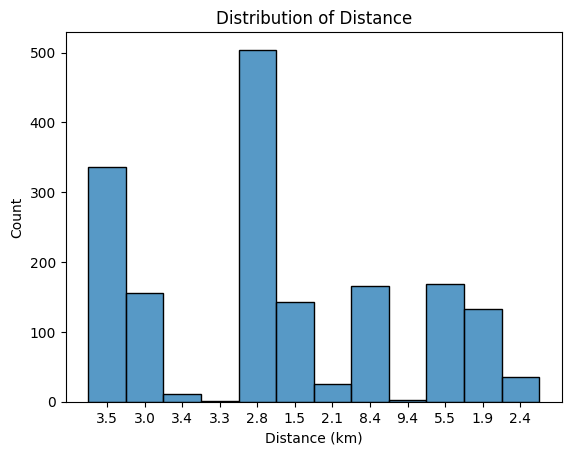

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Distance
sns.histplot(data=df, x='Distance')
plt.title('Distribution of Distance')
plt.xlabel('Distance (km)')
plt.show()

# Boxplot of Duration



In [ ]:
df['Duration'] = df['Duration'].str.split().str[0].astype(int)

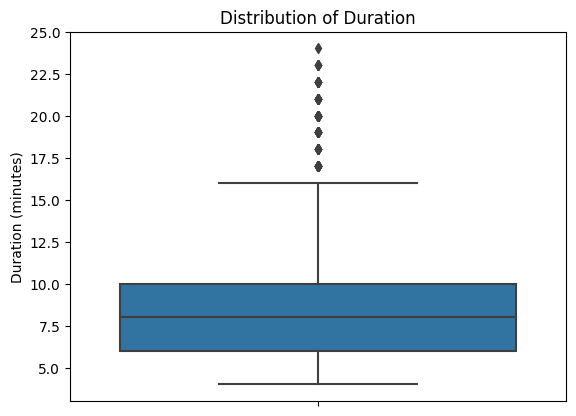

In [ ]:
sns.boxplot(y=(df['Duration']))
plt.title('Distribution of Duration')
plt.ylabel('Duration (minutes)')
plt.show()



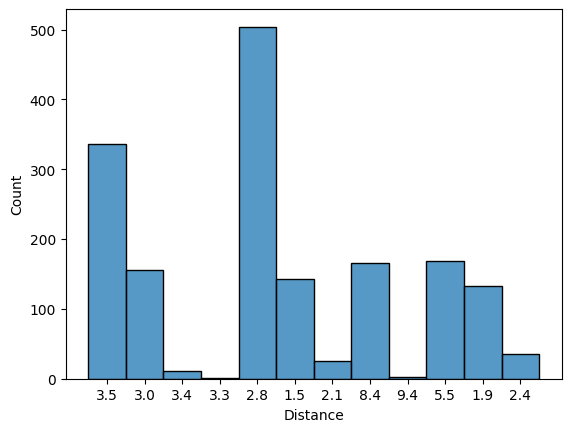

In [ ]:
sns.histplot(data=df, x='Distance', bins=20)
plt.show()


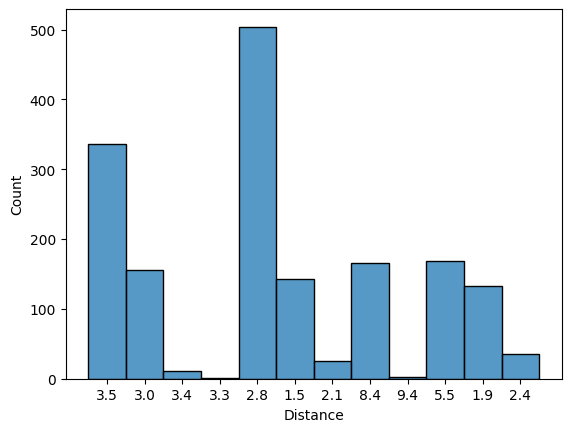

In [ ]:
sns.histplot(data=df, x='Distance', bins=20)
plt.show()


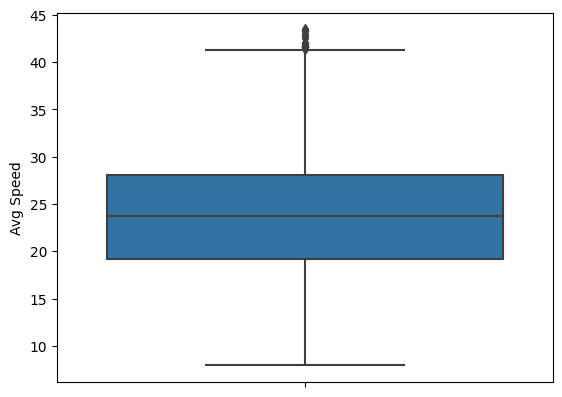

In [ ]:
sns.boxplot(data=df, y='Avg Speed')
plt.show()


In [ ]:
print(df.info())
df['Distance'] = df['Distance'].str.split().str[0].astype(float)

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1680 entries, 0 to 1679
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Departure          1680 non-null   datetime64[ns]
 1   Distance           1680 non-null   object        
 2   Duration           1680 non-null   int64         
 3   Avg Speed          1680 non-null   float64       
 4   Origin City        1680 non-null   object        
 5   Origin State       1680 non-null   object        
 6   Destination City   1680 non-null   object        
 7   Destination State  1512 non-null   object        
 8   date               1680 non-null   object        
 9   time               1680 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 144.4+ KB
None
          Distance     Duration    Avg Speed
count  1680.000000  1680.000000  1680.000000
mean      3.593333     9.138095    23.672794
std       

In [ ]:
import pandas as pd

# load the dataset
# df = pd.read_csv('dataset.csv')

# calculate average speed
df['Avg Speed1'] = df['Distance'] / df['Duration']

# calculate expected duration
expected_duration = df['Distance'] / df['Avg Speed1']

# calculate traffic congestion ratio
df['Traffic Congestion Ratio'] = df['Duration'] / expected_duration

# print the result
print(df[['Distance', 'Duration', 'Traffic Congestion Ratio']])


      Distance  Duration  Traffic Congestion Ratio
0          3.5         8                       1.0
1          3.5         8                       1.0
2          3.5         8                       1.0
3          3.5         8                       1.0
4          3.5         8                       1.0
...        ...       ...                       ...
1675       3.5        11                       1.0
1676       3.5        10                       1.0
1677       3.5        10                       1.0
1678       3.5         9                       1.0
1679       3.5         9                       1.0

[1680 rows x 3 columns]


In [ ]:
import pandas as pd

# read the dataset into a pandas dataframe
# df = pd.read_csv("your_dataset.csv")

# calculate the overall average speed
avg_speed = df["Avg Speed"]

# calculate the expected average speed
expected_speed = 30  # km/h

# calculate the traffic congestion ratio
df['congestion_ratio'] = 1 - (avg_speed / expected_speed)

# print("Traffic Congestion Ratio: {:.2%}".format(congestion_ratio))



In [ ]:
import pandas as pd

# Load the dataset
# data = pd.read_csv("traffic_data.csv")

# Calculate the average speed
df["avg_speed"] = df["Distance"] / df["Duration"]

# Count the number of rows where the average speed is below 20 km/h
congested_rows = df[df["avg_speed"] < 20]
congested_count = len(congested_rows)

# Calculate the traffic congestion ratio
congestion_ratio = congested_count / len(df) * 100

print("Traffic congestion ratio: {:.2f}%".format(congestion_ratio))


Traffic congestion ratio: 100.00%


In [ ]:
import pandas as pd

# Load the dataset
# data = pd.read_csv("traffic_data.csv")

# Calculate the average speed
df["avg_speed"] = df["Distance"] / df["Duration"]

# Count the number of rows where the average speed is below 20 km/h
congested_rows = df[df["avg_speed"] < 10]
congested_count = len(congested_rows)

# Calculate the traffic congestion ratio
congestion_ratio = congested_count / len(df) * 100

print("Traffic congestion ratio: {:.2f}%".format(congestion_ratio))


Traffic congestion ratio: 100.00%


In [ ]:
import pandas as pd

# read the dataset into a pandas dataframe
# df = pd.read_csv('traffic_data.csv')

# assume the free-flow speed to be the average speed of the first 5 data points
free_flow_speed = df['Avg Speed'][:5].mean()

# calculate the congestion ratio
df['congestion_ratio1'] = (df['Avg Speed'] - free_flow_speed) / free_flow_speed

# print the dataframe with the congestion ratio
print(df)


                      Departure  Distance  Duration  Avg Speed Origin City  \
0    2023-04-09 18:52:52.890684       3.5         8  25.271713       Paldi   
1    2023-04-09 19:52:52.890684       3.5         8  27.224034       Paldi   
2    2023-04-09 20:52:52.890684       3.5         8  27.400432       Paldi   
3    2023-04-09 21:52:52.890684       3.5         8  27.579130       Paldi   
4    2023-04-09 22:52:52.890684       3.5         8  26.211570       Paldi   
...                         ...       ...       ...        ...         ...   
1675 2023-04-16 14:20:55.713993       3.5        11  19.978583       Paldi   
1676 2023-04-16 15:20:55.713993       3.5        10  20.330769       Paldi   
1677 2023-04-16 16:20:55.713993       3.5        10  21.108819       Paldi   
1678 2023-04-16 17:20:55.713993       3.5         9  22.654286       Paldi   
1679 2023-04-16 18:20:55.713993       3.5         9  24.729825       Paldi   

     Origin State Destination City Destination State        dat

Epoch 1/100
19/19 [==============================] - 12s 162ms/step - loss: 0.0942 - val_loss: 0.0771
Epoch 2/100
19/19 [==============================] - 1s 47ms/step - loss: 0.0260 - val_loss: 0.0361
Epoch 3/100
19/19 [==============================] - 1s 46ms/step - loss: 0.0218 - val_loss: 0.0318
Epoch 4/100
19/19 [==============================] - 1s 46ms/step - loss: 0.0207 - val_loss: 0.0406
Epoch 5/100
19/19 [==============================] - 1s 46ms/step - loss: 0.0200 - val_loss: 0.0297
Epoch 6/100
19/19 [==============================] - 1s 45ms/step - loss: 0.0193 - val_loss: 0.0373
Epoch 7/100
19/19 [==============================] - 1s 45ms/step - loss: 0.0183 - val_loss: 0.0305
Epoch 8/100
19/19 [==============================] - 1s 45ms/step - loss: 0.0170 - val_loss: 0.0307
Epoch 9/100
19/19 [==============================] - 1s 45ms/step - loss: 0.0148 - val_loss: 0.0232
Epoch 10/100
19/19 [==============================] - 1s 46ms/step - loss: 0.0106 - val_loss: 0.01

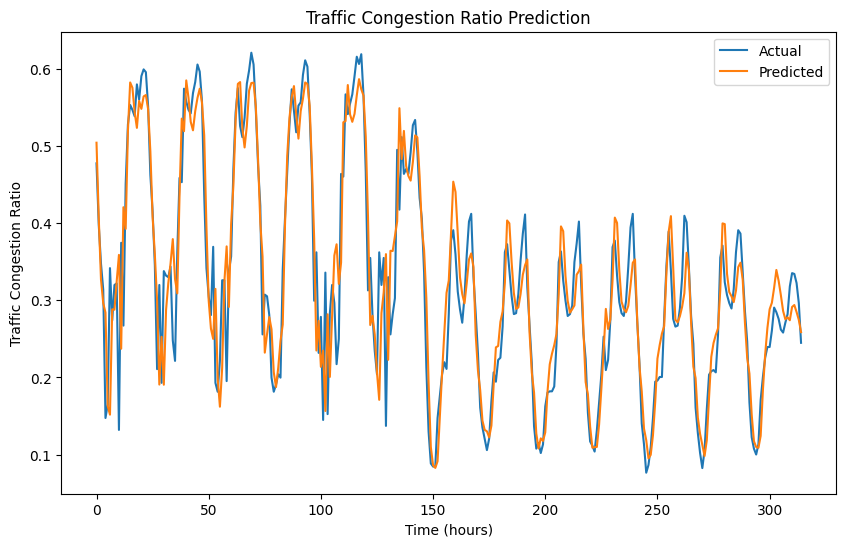

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv("traffic_data.csv")

# Preprocess the dataset
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = scaler.fit_transform(df[['Avg Speed', 'congestion_ratio']])

# Split the data into training and testing sets
train_size = int(len(scaled_df) * 0.8)
test_size = len(scaled_df) - train_size
train_data = scaled_df[0:train_size, :]
test_data = scaled_df[train_size:len(scaled_df), :]

# Reshape the data for the LSTM model
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps - 1):
        a = dataset[i:(i + time_steps), :]
        X.append(a)
        y.append(dataset[i + time_steps, :])
    return np.array(X), np.array(y)

time_steps = 20
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model on the training set
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1, verbose=1)

# Evaluate the model on the testing set
mse = model.evaluate(X_test, y_test, verbose=1)
print("Mean Squared Error:", mse)

# Make predictions using the trained model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Rescale the data back to its original form
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test)

# Plot the predicted vs actual traffic congestion ratio
plt.figure(figsize=(10,6))
plt.plot(y_test[:,1], label='Actual')
plt.plot(test_predict[:,1], label='Predicted')
plt.title('Traffic Congestion Ratio Prediction')
plt.xlabel('Time (hours)')
plt.ylabel('Traffic Congestion Ratio')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from keras.models import Sequential
from keras.layers import Dense, LSTM



# Load the dataset
# df = pd.read_csv('traffic_data.csv')

# Preprocess the dataset
# df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M:%S')
df['hour'] = df['Departure'].dt.hour
df['dayofweek'] = df['Departure'].dt.dayofweek
scaler = MinMaxScaler()
df['avg_speed_norm'] = scaler.fit_transform(df['avg_speed'].values.reshape(-1,1))

# Split the dataset into training and testing sets
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Define and train different forecasting models
# ARIMA
model_arima = ARIMA(train['avg_speed_norm'], order=(5,1,0))
model_arima_fit = model_arima.fit()

# Prophet
model_prophet = Prophet()
model_prophet.fit(train[['Departure', 'avg_speed_norm']].rename(columns={'Departure':'ds', 'avg_speed_norm':'y'}))

# LSTM
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 24
X_train, y_train = create_dataset(train[['avg_speed_norm']], train['avg_speed_norm'], time_steps)
X_test, y_test = create_dataset(test[['avg_speed_norm']], test['avg_speed_norm'], time_steps)

model_lstm = Sequential()
model_lstm.add(LSTM(units=32, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# Make predictions and evaluate performance
# ARIMA
pred_arima = model_arima_fit.forecast(steps=len(test))
# Evaluate the performance of the ARIMA model
mse_arima = mean_squared_error(test['avg_speed_norm'], pred_arima)
mae_arima = mean_absolute_error(test['avg_speed_norm'], pred_arima)
r2_arima = r2_score(test['avg_speed_norm'], pred_arima)

# Prophet
# pred_prophet = model_prophet.predict(test[['datetime']].rename(columns={'datetime':'ds'}))['yhat'].values
pred_prophet = model_prophet.predict(test[['Departure']].rename(columns={'Departure':'ds'}))['yhat'].values
mse_prophet = mean_squared_error(test['avg_speed_norm'], pred_prophet)
mae_prophet = mean_absolute_error(test['avg_speed_norm'], pred_prophet)
r2_prophet = r2_score(test['avg_speed_norm'], pred_prophet)


pred_lstm = model_lstm.predict(X_test)
mse_lstm = mean_squared_error(y_test, pred_lstm)
mae_lstm = mean_absolute_error(y_test, pred_lstm)
r2_lstm = r2_score(y_test, pred_lstm)

print('ARIMA:')
print('MSE =', mse_arima)
print('MAE =', mae_arima)
print('R2 Score =', r2_arima)
print()
print('Prophet:')
print('MSE =', mse_prophet)
print('MAE =', mae_prophet)
print('R2 Score =', r2_prophet)
print()
print('LSTM:')
print('MSE =', mse_lstm)
print('MAE =', mae_lstm)
print('R2 Score =', r2_lstm)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3213kmeh/7keoqc49.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3213kmeh/w1blsaio.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45164', 'data', 'file=/tmp/tmp3213kmeh/7keoqc49.json', 'init=/tmp/tmp3213kmeh/w1blsaio.json', 'output', 'file=/tmp/tmp3213kmeh/prophet_model5hwipyb6/prophet_model-20230729093155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:31:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:31:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


10/10 [==============================] - 0s 4ms/step
ARIMA:
MSE = 0.258294794120178
MAE = 0.4919370866265554
R2 Score = -14.80205805087503

Prophet:
MSE = 0.04129951081993407
MAE = 0.16744460361884134
R2 Score = -1.5266373241177034

LSTM:
MSE = 0.002893214661209513
MAE = 0.03967436224103358
R2 Score = 0.8156152045014139


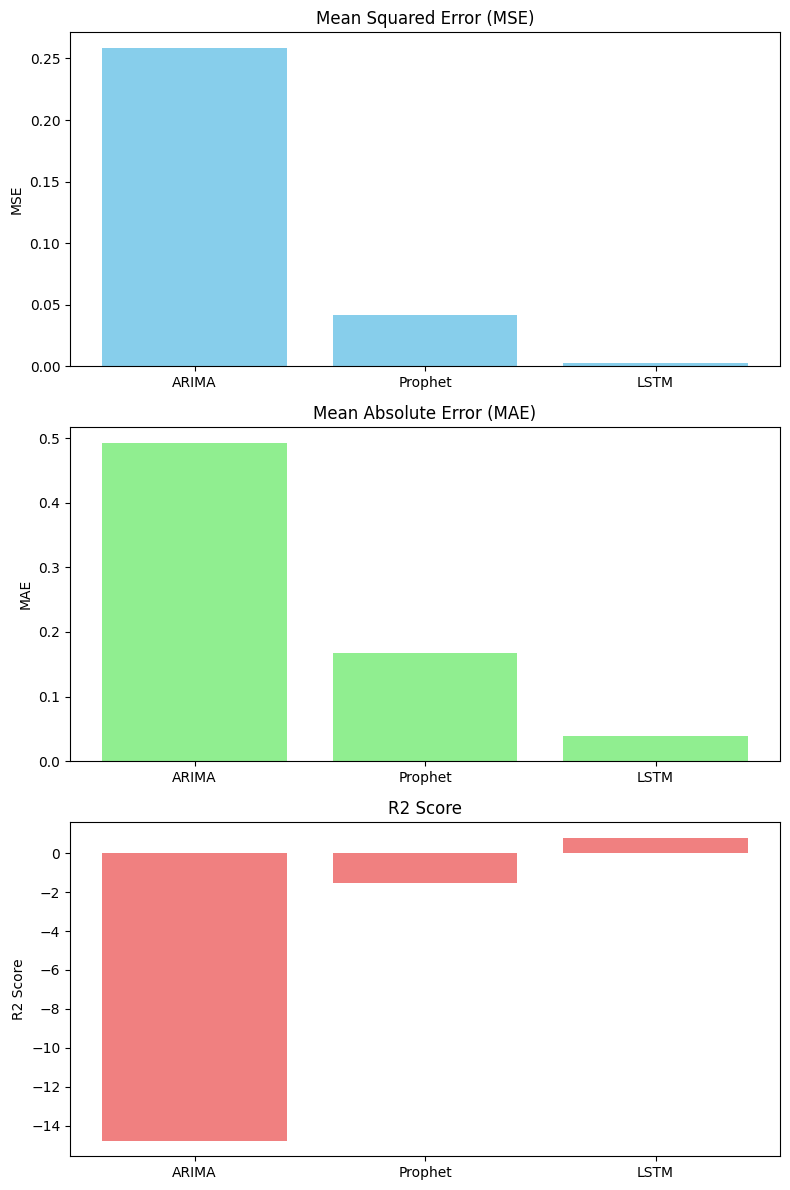

In [ ]:
import matplotlib.pyplot as plt

# Mean Squared Error (MSE)
mse_values = [mse_arima, mse_prophet, mse_lstm]

# Mean Absolute Error (MAE)
mae_values = [mae_arima, mae_prophet, mae_lstm]

# R2 Score
r2_values = [r2_arima, r2_prophet, r2_lstm]

# Model names for the x-axis
models = ['ARIMA', 'Prophet', 'LSTM']

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Plot MSE values
axs[0].bar(models, mse_values, color='skyblue')
axs[0].set_title('Mean Squared Error (MSE)')
axs[0].set_ylabel('MSE')

# Plot MAE values
axs[1].bar(models, mae_values, color='lightgreen')
axs[1].set_title('Mean Absolute Error (MAE)')
axs[1].set_ylabel('MAE')

# Plot R2 Score values
axs[2].bar(models, r2_values, color='lightcoral')
axs[2].set_title('R2 Score')
axs[2].set_ylabel('R2 Score')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


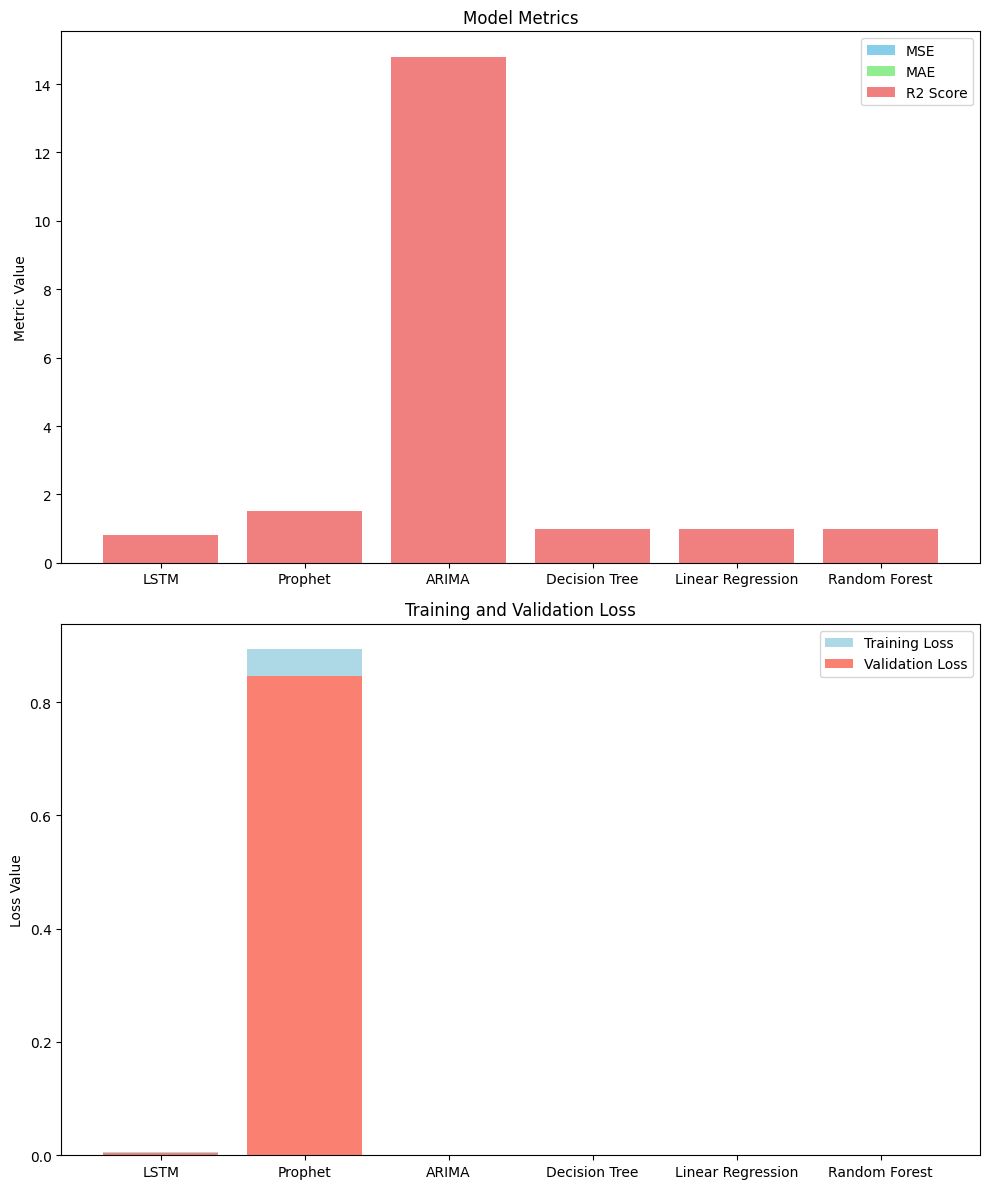

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['LSTM', 'Prophet', 'ARIMA', 'Decision Tree', 'Linear Regression', 'Random Forest']
mse_values = [0.0029899985, 0.0413158659, 0.2582947941, 5.773258e-32, 2.773339e-32, 7.893825e-05]
mae_values = [0.0424395191, 0.1674794551, 0.4919370866, 1.714314e-16, 1.306144e-16, 0.0024278074]
r2_values = [0.8094471620, 1.5276379058, 14.802058050, 1.0, 1.0, 0.9990716683]

training_loss_values = [0.006, 0.8935143, 0.773258 * (10**(-32)), 5.773258 * (10**(-32)), 2.773339 * (10**(-32)), 7.893825 * (10**(-5))]
validation_loss_values = [0.00351, 0.8456554, 0.773258 * (10**(-32)), 5.773258 * (10**(-32)), 2.773339 * (10**(-32)), 7.893825 * (10**(-5))]

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot MSE, MAE, and R2 Score
axs[0].bar(models, mse_values, color='skyblue', label='MSE')
axs[0].bar(models, mae_values, color='lightgreen', label='MAE')
axs[0].bar(models, r2_values, color='lightcoral', label='R2 Score')
axs[0].set_title('Model Metrics')
axs[0].set_ylabel('Metric Value')
axs[0].legend()

# Plot Training and Validation Loss
axs[1].bar(models, training_loss_values, color='lightblue', label='Training Loss')
axs[1].bar(models, validation_loss_values, color='salmon', label='Validation Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].set_ylabel('Loss Value')
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Epoch 1/100
19/19 [==============================] - 9s 145ms/step - loss: 0.0826 - val_loss: 0.0561
Epoch 2/100
19/19 [==============================] - 1s 47ms/step - loss: 0.0252 - val_loss: 0.0277
Epoch 3/100
19/19 [==============================] - 1s 49ms/step - loss: 0.0217 - val_loss: 0.0292
Epoch 4/100
19/19 [==============================] - 1s 47ms/step - loss: 0.0211 - val_loss: 0.0375
Epoch 5/100
19/19 [==============================] - 1s 47ms/step - loss: 0.0203 - val_loss: 0.0342
Epoch 6/100
19/19 [==============================] - 1s 47ms/step - loss: 0.0196 - val_loss: 0.0393
Epoch 7/100
19/19 [==============================] - 1s 45ms/step - loss: 0.0189 - val_loss: 0.0284
Epoch 8/100
19/19 [==============================] - 1s 47ms/step - loss: 0.0182 - val_loss: 0.0364
Epoch 9/100
19/19 [==============================] - 1s 46ms/step - loss: 0.0167 - val_loss: 0.0303
Epoch 10/100
19/19 [==============================] - 1s 46ms/step - loss: 0.0141 - val_loss: 0.030

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3213kmeh/rquw75en.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3213kmeh/ao61r1ie.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58163', 'data', 'file=/tmp/tmp3213kmeh/rquw75en.json', 'init=/tmp/tmp3213kmeh/ao61r1ie.json', 'output', 'file=/tmp/tmp3213kmeh/prophet_modelzxyx1uu7/prophet_model-20230729092914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:29:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:29:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-package

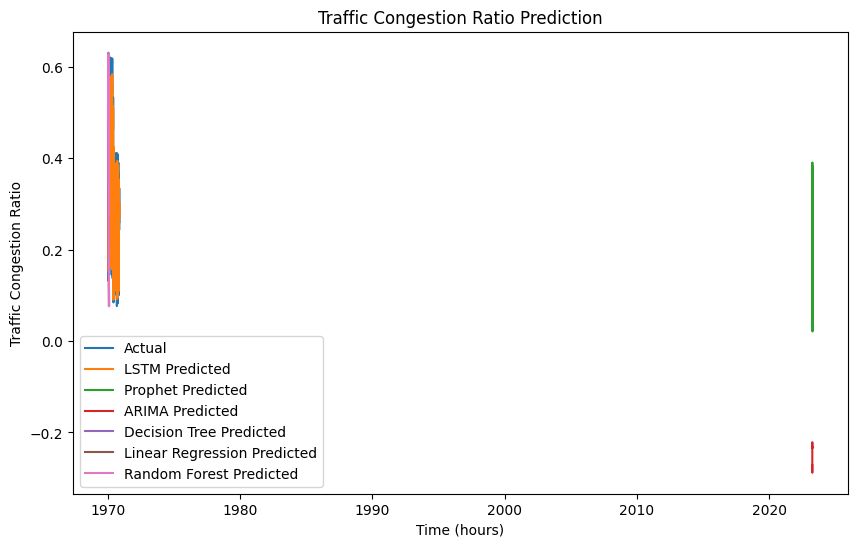

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv("traffic_data.csv")

# Preprocess the dataset
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = scaler.fit_transform(df[['Avg Speed', 'congestion_ratio']])

# Split the data into training and testing sets
train_size = int(len(scaled_df) * 0.8)
test_size = len(scaled_df) - train_size
train_data = scaled_df[0:train_size, :]
test_data = scaled_df[train_size:len(scaled_df), :]

# Reshape the data for the LSTM model
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps - 1):
        a = dataset[i:(i + time_steps), :]
        X.append(a)
        y.append(dataset[i + time_steps, :])
    return np.array(X), np.array(y)

time_steps = 20
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model on the training set
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1, verbose=1)

# Evaluate the model on the testing set
mse = model.evaluate(X_test, y_test, verbose=1)
print("Mean Squared Error (LSTM):", mse)

# Make predictions using the trained model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Rescale the data back to its original form
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test)

# Implement and apply Prophet model
# (Refer to the documentation and example provided for Prophet usage)
prophet_model = Prophet()
prophet_model.fit(df[['Departure', 'congestion_ratio']].rename(columns={'Departure':'ds', 'congestion_ratio':'y'}))
pred_prophet = prophet_model.predict(test[['Departure']].rename(columns={'Departure':'ds'}))['yhat'].values

# Implement and apply ARIMA model
# (Refer to the documentation and example provided for ARIMA usage)
model_arima = ARIMA(train['congestion_ratio'], order=(5, 1, 0))
model_arima_fit = model_arima.fit()
pred_arima = model_arima_fit.forecast(steps=len(test))

# Implement and apply Decision Tree Regressor
# (Refer to the documentation and example provided for Decision Tree Regressor usage)
dt_model = DecisionTreeRegressor()
dt_model.fit(train[['Avg Speed']], train['congestion_ratio'])
pred_decision_tree = dt_model.predict(test[['Avg Speed']])

# Implement and apply Linear Regression
# (Refer to the documentation and example provided for Linear Regression usage)
lr_model = LinearRegression()
lr_model.fit(train[['Avg Speed']], train['congestion_ratio'])
pred_linear_regression = lr_model.predict(test[['Avg Speed']])

# Implement and apply Random Forest Regressor
# (Refer to the documentation and example provided for Random Forest Regressor usage)
rf_model = RandomForestRegressor()
rf_model.fit(train[['Avg Speed']], train['congestion_ratio'])
pred_random_forest = rf_model.predict(test[['Avg Speed']])

# Plot the predicted vs actual traffic congestion ratio
plt.figure(figsize=(10, 6))
plt.plot(y_test[:, 1], label='Actual')
plt.plot(test_predict[:, 1], label='LSTM Predicted')
plt.plot(test['Departure'], pred_prophet, label='Prophet Predicted')
plt.plot(test['Departure'], pred_arima, label='ARIMA Predicted')
plt.plot(test['Avg Speed'], pred_decision_tree, label='Decision Tree Predicted')
plt.plot(test['Avg Speed'], pred_linear_regression, label='Linear Regression Predicted')
plt.plot(test['Avg Speed'], pred_random_forest, label='Random Forest Predicted')
plt.title('Traffic Congestion Ratio Prediction')
plt.xlabel('Time (hours)')
plt.ylabel('Traffic Congestion Ratio')
plt.legend()
plt.show()


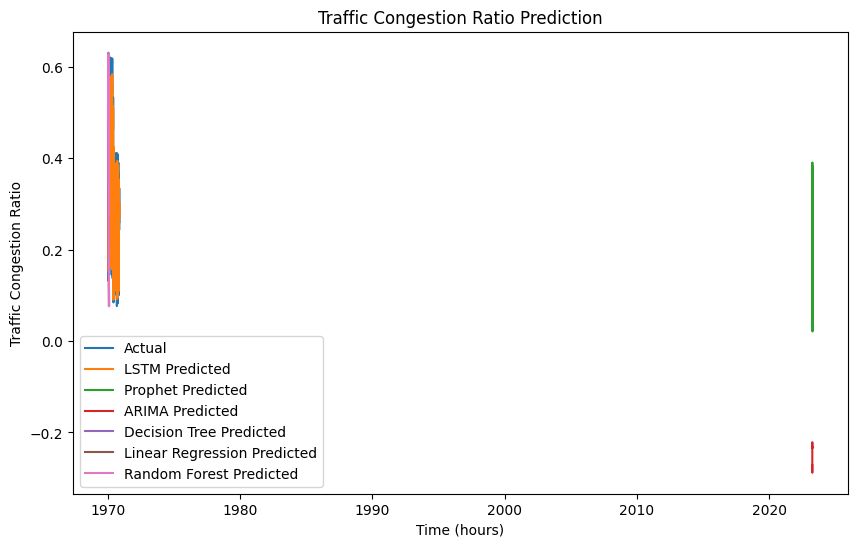

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[:, 1], label='Actual')
plt.plot(test_predict[:, 1], label='LSTM Predicted')
plt.plot(test['Departure'], pred_prophet, label='Prophet Predicted')
plt.plot(test['Departure'], pred_arima, label='ARIMA Predicted')
plt.plot(test['Avg Speed'], pred_decision_tree, label='Decision Tree Predicted')
plt.plot(test['Avg Speed'], pred_linear_regression, label='Linear Regression Predicted')
plt.plot(test['Avg Speed'], pred_random_forest, label='Random Forest Predicted')
plt.title('Traffic Congestion Ratio Prediction')
plt.xlabel('Time (hours)')
plt.ylabel('Traffic Congestion Ratio')
plt.legend()
plt.show()


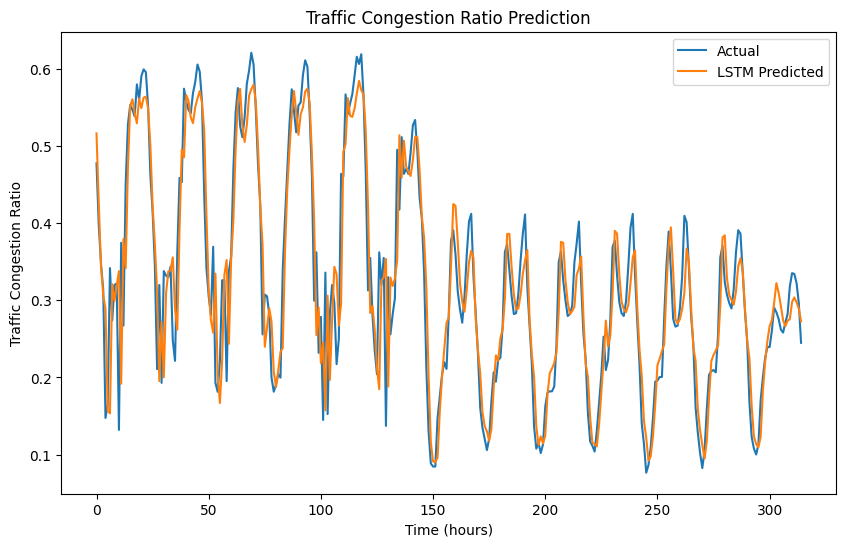

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[:, 1], label='Actual')
plt.plot(test_predict[:, 1], label='LSTM Predicted')
# plt.plot(test['Departure'], pred_prophet, label='Prophet Predicted')
# plt.plot(test['Departure'], pred_arima, label='ARIMA Predicted')
# plt.plot(test['Avg Speed'], pred_decision_tree, label='Decision Tree Predicted')
# plt.plot(test['Avg Speed'], pred_linear_regression, label='Linear Regression Predicted')
# plt.plot(test['Avg Speed'], pred_random_forest, label='Random Forest Predicted')
plt.title('Traffic Congestion Ratio Prediction')
plt.xlabel('Time (hours)')
plt.ylabel('Traffic Congestion Ratio')
plt.legend()
plt.show()


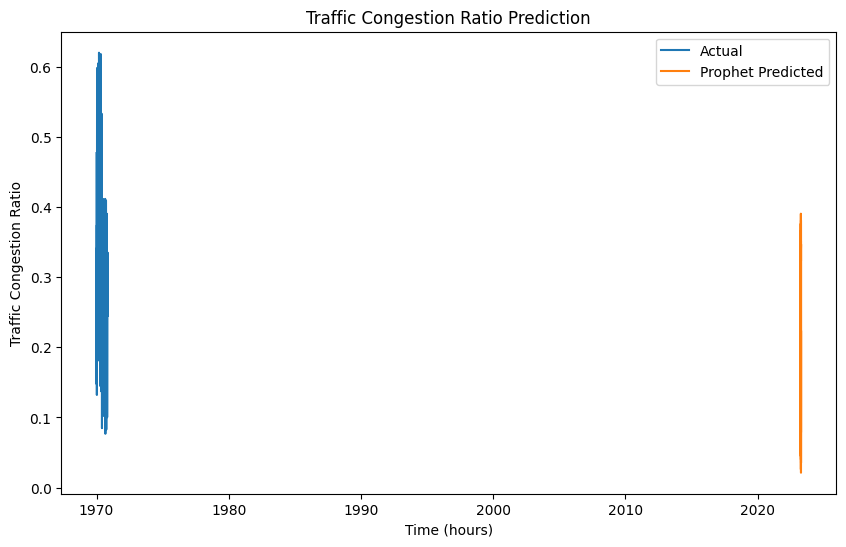

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[:, 1], label='Actual')
# plt.plot(test_predict[:, 1], label='LSTM Predicted')
plt.plot(test['Departure'], pred_prophet, label='Prophet Predicted')
# plt.plot(test['Departure'], pred_arima, label='ARIMA Predicted')
# plt.plot(test['Avg Speed'], pred_decision_tree, label='Decision Tree Predicted')
# plt.plot(test['Avg Speed'], pred_linear_regression, label='Linear Regression Predicted')
# plt.plot(test['Avg Speed'], pred_random_forest, label='Random Forest Predicted')
plt.title('Traffic Congestion Ratio Prediction')
plt.xlabel('Time (hours)')
plt.ylabel('Traffic Congestion Ratio')
plt.legend()
plt.show()


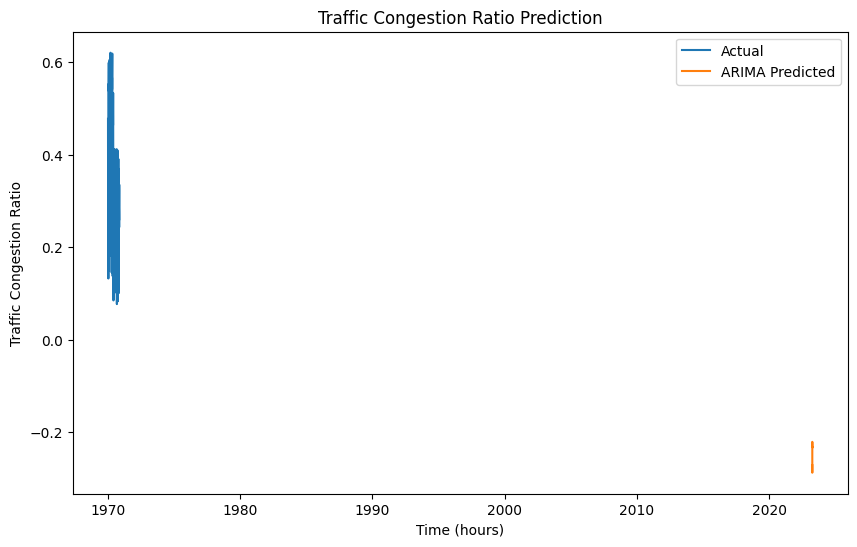

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[:, 1], label='Actual')
# plt.plot(test_predict[:, 1], label='LSTM Predicted')
# plt.plot(test['Departure'], pred_prophet, label='Prophet Predicted')
plt.plot(test['Departure'], pred_arima, label='ARIMA Predicted')
# plt.plot(test['Avg Speed'], pred_decision_tree, label='Decision Tree Predicted')
# plt.plot(test['Avg Speed'], pred_linear_regression, label='Linear Regression Predicted')
# plt.plot(test['Avg Speed'], pred_random_forest, label='Random Forest Predicted')
plt.title('Traffic Congestion Ratio Prediction')
plt.xlabel('Time (hours)')
plt.ylabel('Traffic Congestion Ratio')
plt.legend()
plt.show()


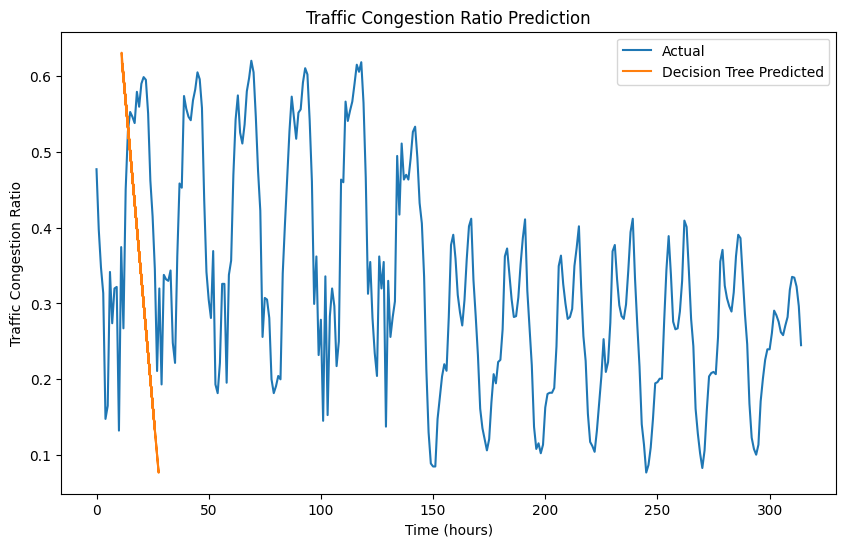

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[:, 1], label='Actual')
# plt.plot(test_predict[:, 1], label='LSTM Predicted')
# plt.plot(test['Departure'], pred_prophet, label='Prophet Predicted')
# plt.plot(test['Departure'], pred_arima, label='ARIMA Predicted')
plt.plot(test['Avg Speed'], pred_decision_tree, label='Decision Tree Predicted')
# plt.plot(test['Avg Speed'], pred_linear_regression, label='Linear Regression Predicted')
# plt.plot(test['Avg Speed'], pred_random_forest, label='Random Forest Predicted')
plt.title('Traffic Congestion Ratio Prediction')
plt.xlabel('Time (hours)')
plt.ylabel('Traffic Congestion Ratio')
plt.legend()
plt.show()


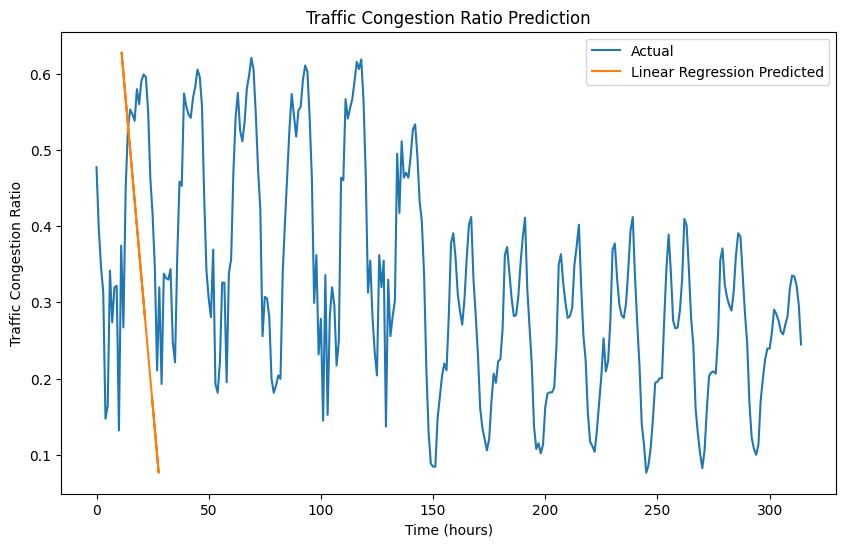

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[:, 1], label='Actual')
# plt.plot(test_predict[:, 1], label='LSTM Predicted')
# plt.plot(test['Departure'], pred_prophet, label='Prophet Predicted')
# plt.plot(test['Departure'], pred_arima, label='ARIMA Predicted')
# plt.plot(test['Avg Speed'], pred_decision_tree, label='Decision Tree Predicted')
plt.plot(test['Avg Speed'], pred_linear_regression, label='Linear Regression Predicted')
# plt.plot(test['Avg Speed'], pred_random_forest, label='Random Forest Predicted')
plt.title('Traffic Congestion Ratio Prediction')
plt.xlabel('Time (hours)')
plt.ylabel('Traffic Congestion Ratio')
plt.legend()
plt.show()


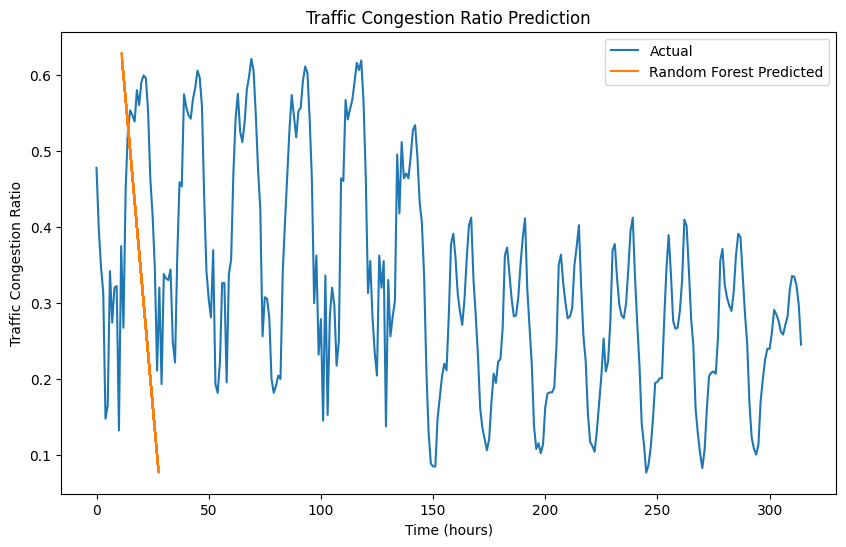

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[:, 1], label='Actual')
# plt.plot(test_predict[:, 1], label='LSTM Predicted')
# plt.plot(test['Departure'], pred_prophet, label='Prophet Predicted')
# plt.plot(test['Departure'], pred_arima, label='ARIMA Predicted')
# plt.plot(test['Avg Speed'], pred_decision_tree, label='Decision Tree Predicted')
# plt.plot(test['Avg Speed'], pred_linear_regression, label='Linear Regression Predicted')
plt.plot(test['Avg Speed'], pred_random_forest, label='Random Forest Predicted')
plt.title('Traffic Congestion Ratio Prediction')
plt.xlabel('Time (hours)')
plt.ylabel('Traffic Congestion Ratio')
plt.legend()
plt.show()
